# Adding multiple terms of the same class

Here we demonstrate how to have multiple energy terms of the same class in the energy equation. For the sample, we choose a one-dimensional chain of magnetic moments.

In [1]:
import random
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

p1 = (-10e-9, 0, 0)
p2 = (10e-9, 1e-9, 1e-9)
cell = (1e-9, 1e-9, 1e-9)
region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, cell=cell)

The mesh is

In [2]:
mesh.k3d()

Output()

The system has an energy equation, which consists of two Zeeman energy terms.

In [3]:
H1 = (0, 0, 1e6)
H2 = (1e6, 0, 0)

system = mm.System(name='multiple_terms')

Now, if we try to add two energy terms, we get an exception raised.

In [4]:
try:
    system.energy = mm.Zeeman(H=(0, 0, 1e5)) + mm.Zeeman(H=(0, 1e5, 0))
except ValueError:
    print('Exception raised.')

Exception raised.


This is because different energy terms must have different names, so they can be uniquely identified. So, we have to give names to our energy terms:

In [5]:
system.energy = mm.Zeeman(H=H1, name='zeeman1') + mm.Zeeman(H=H2, name='zeeman2')

We are going to minimise the system's energy using `oommfc.MinDriver` later. Therefore, we do not have to define the system's dynamics equation. Finally, we need to define the system's magnetisation (`system.m`). We are going to make it random with $M_\text{s}=8\times10^{5} \,\text{Am}^{-1}$

In [6]:
import random

random.seed(1)

Ms = 8e5  # saturation magnetisation (A/m)

def m_fun(pos):
    return [2*random.random()-1 for i in range(3)]

system.m = df.Field(mesh, dim=3, value=m_fun, norm=Ms)

Now, we can minimise the system's energy by using `oommfc.MinDriver`.

In [7]:
md = mc.MinDriver()
md.drive(system)

Running OOMMF (ExeOOMMFRunner) [2020/07/01 21:25]... (2.5 s)


We expect that now all magnetic moments are aligned parallel or antiparallel to the anisotropy axis (in the $z$-direction).

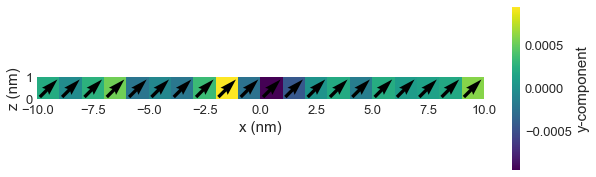

In [8]:
system.m.plane('y').mpl(figsize=(10, 3))

We can see that magnetisation is aligned with the sum of fields `H1+H2`. Finally, let us have a look at the table:

In [9]:
system.table.data

,max_mxHxm,E,delta_E,bracket_count,line_min_count,conjugate_cycle_count,cycle_count,cycle_sub_count,energy_calc_count,E_zeeman1,E_zeeman2,iteration,stage_iteration,stage,mx,my,mz
0,0.003334,-2.843445e-20,-7.222237e-35,27.0,5.0,21.0,23.0,2.0,33.0,-1.421723e-20,-1.421723e-20,30.0,30.0,0.0,0.707107,9.591067e-11,0.707107


We can see that energy terms are marked with the names we gave to energy terms when we defined the energy equation.